In [1]:
# To create Figure 6 in 3-D CMZ Paper I
# 
#  Create a NH2 vs. temp plot for the full CMZ
# then highlight the "warm dust ridge"
# lots of "fun" with 2d histograms

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

#from matplotlib.colors import SymLogNorm
#import matplotlib.colors as cm

#from astropy.utils.data import get_pkg_data_filename
#
#from astropy import units as u
#from astropy.wcs.utils import skycoord_to_pixel
#import aplpy

#from matplotlib.gridspec import GridSpec
#import astropy.io.fits as pyfits
#from matplotlib.patches import Circle
#from matplotlib.patches import Rectangle

#from astropy.nddata import Cutout2D
#from astropy.coordinates import SkyCoord
#import matplotlib.colors as mc
#from astropy.table import Table
#import matplotlib as mpl

#import skimage as ski
#import skimage.measure as measure
#from skimage.draw import polygon2mask

#from astropy.convolution import Gaussian2DKernel

#from scipy.signal import convolve as scipy_convolve
#from astropy.convolution import convolve_fft
#from scipy import ndimage, misc

#from mpl_toolkits.axes_grid1 import make_axes_locatable
#import matplotlib.axes as maxes

#from reproject import reproject_interp



In [6]:
pathfigs = '/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/ALL_figures/'
path='/Users/cab16109/Dropbox/Work/higal_cmz/PAPER/FINAL_DATA_files_for_release/'

In [7]:
# read in data
nh2 = fits.open(path+'higalcmz_column_density_source_only_inner7deg.fits')[0].data
temp = fits.open(path+'higalcmz_temperature_source_only_inner7deg.fits')[0].data

temp_wcs = WCS(fits.open(path+'higalcmz_column_density_source_only_inner7deg.fits')[0].header)

# flatten and remove nans
temp1d=temp.flatten()
nh21d =nh2.flatten()

bad_indices = np.isnan(temp1d) 
good_indices = ~bad_indices

temp1d_good = temp1d[good_indices]
nh21d_good = nh21d[good_indices]

#read in warm dust ridge mask
mask = fits.open('/Users/cab16109/Dropbox/Work/higal_cmz/warm_ridge_mask.fits')[0].data
mask = mask.astype('float')
mask[mask==0.0] = np.nan

ridge_temp = temp*mask
ridge_nh2 = nh2*mask

# flatten and remove nans
ridge_temp1d = ridge_temp.flatten()
ridge_nh21d = ridge_nh2.flatten()

bad_indices = np.isnan(ridge_temp1d) 
good_indices = ~bad_indices

ridge_temp1d_good = ridge_temp1d[good_indices]
ridge_nh21d_good = ridge_nh21d[good_indices]



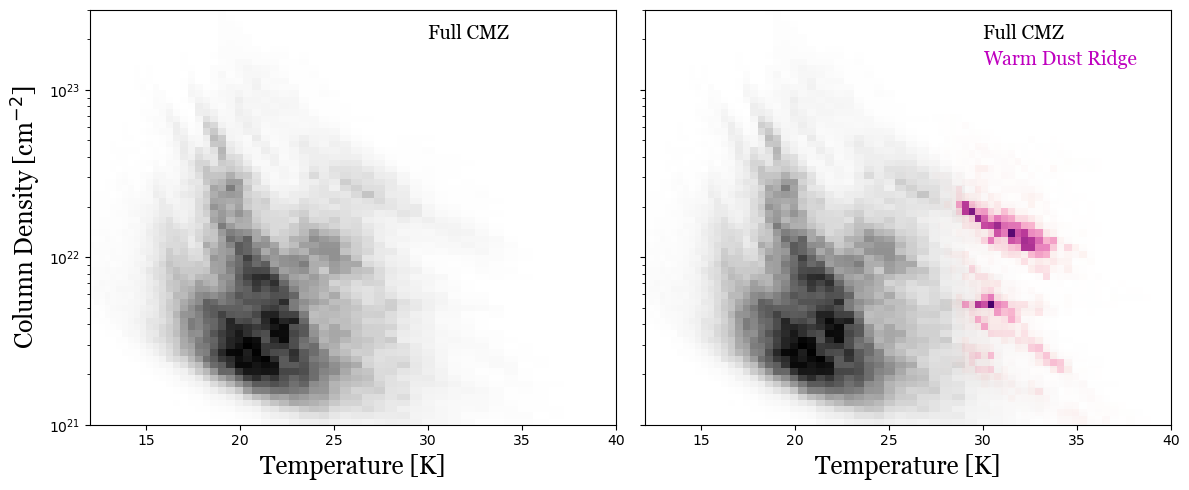

In [11]:
# Create and plot 2D histograms for full sample as well as warm dust ridge region
# Use fading colormap from: https://stackoverflow.com/questions/74879980/how-to-overlay-two-2d-histograms-in-matplotlib
# maybe there is a better?

# Full CMZ histogarmming
xx = temp1d_good
yy = nh21d_good

xmin = np.log10(xx.min())
xmax = np.log10(xx.max())
ymin = np.log10(yy.min())
ymax = np.log10(yy.max())

xbins = np.logspace(xmin, xmax, 100) # <- make a range from 10**xmin to 10**xmax
ybins = np.logspace(ymin, ymax, 100) # <- make a range from 10**ymin to 10**ymax

### ALL THE SAME THINGS BUT FOR THE WARM DUST RIDGE
xr = ridge_temp1d_good
yr = ridge_nh21d_good

xminr = np.log10(xr.min())
xmaxr = np.log10(xr.max())
yminr = np.log10(yr.min())
ymaxr = np.log10(yr.max())

xbinsr = np.logspace(xminr, xmaxr, 50) # <- make a range from 10**xmin to 10**xmax
ybinsr = np.logspace(yminr, ymaxr, 50) # <- make a range from 10**ymin to 10**ymax


# modify existing colormap with a linearly fading alpha
magenta = plt.cm.RdPu  # original colormap
fading_magenta = magenta(np.arange(magenta.N)) # extract colors
fading_magenta[:, -1] = np.linspace(0, 1, magenta.N) # modify alpha
fading_magenta = ListedColormap(fading_magenta) # convert to colormap

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
ax1.hist2d(x=xx, y=yy, bins=(xbins, ybins), cmap="Greys")

ax1.set_xlim([12, 40])
ax1.set_ylim([1e21, 3e23])
ax1.set_yscale('log')
ax1.set_xlabel(r'Temperature [K]', **{'fontname':'Georgia'},fontsize=18)
ax1.set_ylabel(r'Column Density [cm$^{-2}$]', **{'fontname':'Georgia'},fontsize=18)
ax1.text(30, 2e23, 'Full CMZ', **{'fontname':'Georgia'},fontsize=14)

ax2.hist2d(x=xx, y=yy, bins=(xbins, ybins), cmap="Greys")
ax2.hist2d(x=xr, y=yr, bins=(xbinsr, ybinsr),cmap=fading_magenta)

ax2.set_xlim([12, 40])
ax2.set_ylim([1e21, 3e23])
ax2.set_yscale('log')
ax2.set_xlabel(r'Temperature [K]', **{'fontname':'Georgia'},fontsize=18)
ax2.text(30, 2e23, 'Full CMZ', **{'fontname':'Georgia'},fontsize=14)
ax2.text(30, 1.4e23, 'Warm Dust Ridge', color="m", **{'fontname':'Georgia'},fontsize=14)

fig.tight_layout() 

outfile = pathfigs+'nh2_vs_temp_warm_ridge.pdf'
plt.savefig(outfile, format='pdf', dpi=300)
plt.show()
